# The Air Traffic and the Air Pollution Analysis

We use the aggregated data that we have generated from the previous step of the data collection and preparation. In this notebook, we process and analyze them further in order to extract the correlation between air pollution and air traffic. Observe each pollutant to find the most related to air traffic.

- COMP-548DLBig Data Management and Processing
- Georgios Christodoulou

#### Data Source
- **Data_Daily_All.csv** aggregated data for air-quality 
- **cyprus_airport_air_traffic**

In [383]:
import pandas as pd
import numpy as np

df_quality = pd.read_csv("..\datasets\cyprus_air_quality\Data_Daily_All.csv")
df_quality['date'] = pd.to_datetime(df_quality['date'])
print(df_quality.shape)
df_quality.head(5)

(86198, 9)


,Unnamed: 0,date,station_code,pollutant_id,mean_pollutant_value,station_name_en,pollutant_code,pollutant_name_en,Unit_of_measurement_en
0,0,2018-03-14,3,4,1.137500,Limassol -Traffic Station,SO2,Sulfur Dioxide,μg/m³
1,1,2018-04-21,3,4,1.629167,Limassol -Traffic Station,SO2,Sulfur Dioxide,μg/m³
2,2,2018-06-20,3,4,1.354167,Limassol -Traffic Station,SO2,Sulfur Dioxide,μg/m³
3,3,2018-10-18,3,4,1.320833,Limassol -Traffic Station,SO2,Sulfur Dioxide,μg/m³
4,4,2018-10-30,3,4,3.311111,Limassol -Traffic Station,SO2,Sulfur Dioxide,μg/m³


In [384]:
#Pivod tha data
idx = ['date','station_code']
col = ['pollutant_code']
val = ['mean_pollutant_value']

pollutants = df_quality.pollutant_code.unique()

## pivot data by Date, Station Code and Pollutant
df_quality = df_quality.pivot(index=idx, columns= col, values=val).reset_index()
df_quality.columns = df_quality.columns.droplevel(0)
df_quality.columns.values[0] = 'date'
df_quality.columns.values[1] = 'station_code'
df_quality.head(10)

pollutant_code,date,station_code,C6H6,CO,NO,NO2,NOX,O3,SO2
0,2018-01-01,1,1.587500,667.820833,21.095833,27.587500,59.904167,33.233333,1.954167
1,2018-01-01,2,NaN,372.066667,4.075000,18.150000,24.391667,48.358333,0.705556
2,2018-01-01,3,4.220000,534.208333,9.179167,27.820833,41.891667,36.787500,1.891667
3,2018-01-01,5,1.158333,321.662500,3.604167,16.279167,21.775000,53.954167,0.575000
4,2018-01-01,8,0.387500,NaN,1.870833,7.804167,10.683333,54.775000,1.316667
5,2018-01-01,9,0.495833,140.658333,0.021429,2.195833,2.187500,81.862500,0.408333
6,2018-01-01,14,NaN,191.925000,1.116667,7.062500,8.783333,61.154167,4.391667
7,2018-01-01,15,1.108333,448.179167,2.479167,10.745833,14.545833,58.466667,1.708333
8,2018-01-01,16,NaN,330.550000,3.891667,6.995833,12.966667,52.570833,1.770833
9,2018-01-02,1,1.170833,597.312500,21.858333,37.141667,70.650000,28.820833,2.250000


In [385]:
df_traffic = pd.read_csv("..\datasets\cyprus_airport_air_traffic\csv\CYPRUS_AIRPORTS_DAILY_AIR_TRAFFIC_2018_2021_TOTAL.csv")
df_traffic['date'] = pd.to_datetime(df_traffic['date'])
df_traffic
#Merge the data and apply conver data to timestamp
df_quality_traffic = df_quality.merge(df_traffic,how='inner', on=["date","station_code"])
df_quality_traffic.head(5)

,date,station_code,C6H6,CO,NO,NO2,NOX,O3,SO2,airport,total_flights
0,2018-01-01,5,1.158333,321.662500,3.604167,16.279167,21.775000,53.954167,0.575000,Larnaka,83.0
1,2018-01-01,15,1.108333,448.179167,2.479167,10.745833,14.545833,58.466667,1.708333,Pafos,16.0
2,2018-01-02,5,1.800000,439.441667,16.265217,35.441667,59.308333,33.866667,2.941667,Larnaka,163.0
3,2018-01-02,15,0.545833,358.216667,2.045833,6.641667,9.779167,71.208333,1.775000,Pafos,25.0
4,2018-01-03,5,1.450000,418.062500,12.843478,25.508333,44.358333,38.300000,1.075000,Larnaka,155.0


##### Check for Missing values and Fill
the missing values distributed throughout the months we prefer to use the mean of the month to fulfill them

In [386]:
# Check for missing values
columns_missing_values = {}
df = df_quality_traffic.copy()
for c in df.columns:
    msv = df[df[c].isna()| df[c].eq(' ')].shape[0]
    columns_missing_values[c] = (msv,msv/df.shape[0]*100)
    
columns_missing_values

{'date': (0, 0.0),
 'station_code': (0, 0.0),
 'C6H6': (103, 3.5249828884325805),
 'CO': (48, 1.642710472279261),
 'NO': (9, 0.3080082135523614),
 'NO2': (9, 0.3080082135523614),
 'NOX': (9, 0.3080082135523614),
 'O3': (11, 0.37645448323066394),
 'SO2': (24, 0.8213552361396305),
 'airport': (0, 0.0),
 'total_flights': (0, 0.0)}

<AxesSubplot:xlabel='year_month'>

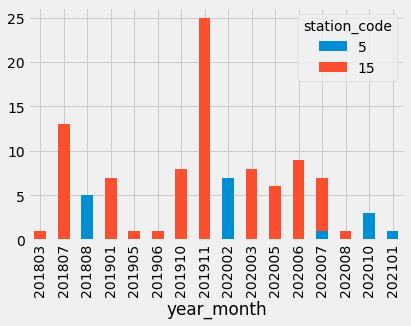

In [387]:
# the missing values distributed throughout the months we prefer to use the mean of the month to fulfill them
df = df_quality_traffic.copy()
df['year_month'] = df['date'].dt.strftime('%Y%m')
df[df['C6H6'].isna()].groupby(['year_month','station_code'])['date'].count().reset_index() \
                .pivot(index='year_month', columns= 'station_code', values='date') \
                .plot.bar(stacked=True)

In [388]:
# update with mean
df = df_quality_traffic.copy()
df['year_month'] = df['date'].dt.strftime('%Y%m')

#df['mean_pollutant_value'].fillna(df.groupby(['year_month','station_code'])['mean_pollutant_value'] \
#                          .transform('mean'), inplace = True)
for p in pollutants:
    df[p].fillna(df.groupby(['year_month','station_code'])[p].transform('mean'), inplace = True)
    
df_quality_traffic  = df.copy()

In [389]:
# Check for missing values
columns_missing_values = {}
df = df_quality_traffic.copy()
for c in df.columns:
    msv = df[df[c].isna()| df[c].eq(' ')].shape[0]
    columns_missing_values[c] = (msv,msv/df.shape[0]*100)
    
columns_missing_values

{'date': (0, 0.0),
 'station_code': (0, 0.0),
 'C6H6': (0, 0.0),
 'CO': (0, 0.0),
 'NO': (0, 0.0),
 'NO2': (0, 0.0),
 'NOX': (0, 0.0),
 'O3': (0, 0.0),
 'SO2': (0, 0.0),
 'airport': (0, 0.0),
 'total_flights': (0, 0.0),
 'year_month': (0, 0.0)}

#### Pollutant Level
Update the dataset with pollutant levels, the higher value of each one indicates the level of pollution

In [390]:
## Value for each polluta
df_pLevels = pd.read_csv("..\datasets\cyprus_air_quality\PollutantsLevels.csv")
print(df_pLevels.shape)
df_pLevels.groupby('pollutant_code')['level_value'].count()

(36, 5)


pollutant_code
C6H6    4
CO      4
NO      4
NO2     4
NOX     4
O3      4
PM10    4
PM25    4
SO2     4
Name: level_value, dtype: int64

In [391]:
def getLevel(pol,value):
    dfr = df_pLevels.loc[(df_pLevels.pollutant_code == pol)&(value >= df_pLevels.min_range)&(value < df_pLevels.max_range)].copy()

    if dfr.empty:
        return 'Error'
    else:
        return  dfr.level_value.values[0] 


In [392]:
df = df_quality_traffic.copy()

p_levels = []
for p in pollutants:
    p_levels.append(p+'_level')
    df[p+'_level'] = df.apply(lambda x: getLevel(p,x[p]), axis=1)

df['pollution_level'] = df[p_levels].max(axis=1)
df_quality_traffic = df.copy()

##### Check the correlation between pollutants and find the most related to traffic in order to be used for further analysis
The results have there is an interesting correlation around between round to 20-30% between air traffic and pollutants

In [39]:
# add visualization libraries
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [40]:
col_val = ['C6H6','CO','NO','NOX','O3','SO2','total_flights']
df_quality_traffic[col_val].corr().style.background_gradient(cmap='coolwarm')

,C6H6,CO,NO,NOX,O3,SO2,total_flights
C6H6,1.000000,0.718105,0.785551,0.813189,-0.711590,0.464924,0.123855
CO,0.718105,1.000000,0.697521,0.730743,-0.576779,0.408716,0.224559
NO,0.785551,0.697521,1.000000,0.957156,-0.746783,0.486359,0.146560
NOX,0.813189,0.730743,0.957156,1.000000,-0.766097,0.574239,0.238557
O3,-0.711590,-0.576779,-0.746783,-0.766097,1.000000,-0.409566,-0.135783
SO2,0.464924,0.408716,0.486359,0.574239,-0.409566,1.000000,0.373952
total_flights,0.123855,0.224559,0.146560,0.238557,-0.135783,0.373952,1.000000


,pollutant,correlation
6,O3,-0.135783
1,C6H6,0.123855
5,NO,0.146560
2,CO,0.224559
4,NOX,0.238557
3,NO2,0.296225
0,SO2,0.373952


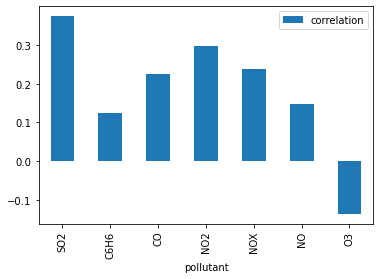

In [41]:
pollutants# = df_quality_traffic.pollutant_code.unique()
pvt = []
for p in pollutants:
    #    dset = df_quality_traffic.loc[(df_quality_traffic['pollutant_code'] == p)].copy()
    corr = df_quality_traffic[[p,'total_flights']].corr(method='pearson',min_periods=3)[p].total_flights
    pvt.append([p,corr])

pvt = pd.DataFrame(pvt, columns=['pollutant','correlation'])
pvt.set_index('pollutant').plot.bar()
pvt.sort_values('correlation')

<AxesSubplot:xlabel='airport'>

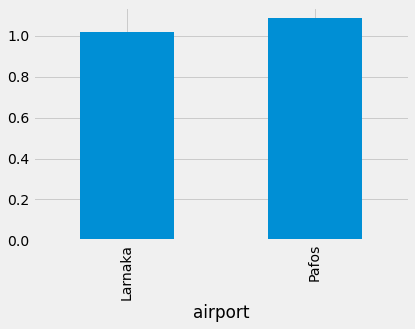

In [377]:
# Mean values per airport/station
df_quality_traffic.groupby('airport')['pollution_level'].mean().plot.bar()

In [382]:
df_quality_traffic.groupby(['airport','date'])['pollution_level'].mean()

airport  date      
Larnaka  2018-01-01    1
         2018-01-02    1
         2018-01-03    1
         2018-01-04    1
         2018-01-05    1
                      ..
Pafos    2021-12-27    1
         2021-12-28    1
         2021-12-29    1
         2021-12-30    1
         2021-12-31    1
Name: pollution_level, Length: 2922, dtype: int64

#### Normalize value
- Normalize the scales of features between 0 and 1, without distorting differences in the ranges of values. 
- For comparing the values of pollutants and total flights number.
- Use the (MinMaxScaler) 
- zi = (χi – min(x))/(max(x)-min(x)

In [45]:
import pandas as pd
from sklearn import preprocessing

col_val = ['C6H6','CO','NO','NOX','O3','SO2','total_flights']
x = df_quality_traffic[col_val].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=col_val)
col = ['date','airport']
df_quality_traffic_norm = df_quality_traffic[col].join(df)
df_quality_traffic_norm

,date,airport,C6H6,CO,NO,NOX,O3,SO2,total_flights
0,2018-01-01,Larnaka,0.201012,0.221131,0.070960,0.161424,0.364777,0.048893,0.261830
1,2018-01-01,Pafos,0.192336,0.331018,0.047236,0.104969,0.407169,0.149948,0.050473
2,2018-01-02,Larnaka,0.312364,0.323429,0.337948,0.454533,0.176065,0.259920,0.514196
3,2018-01-02,Pafos,0.094722,0.252881,0.038099,0.067744,0.526871,0.155892,0.078864
4,2018-01-03,Larnaka,0.251627,0.304860,0.265793,0.337784,0.217714,0.093476,0.488959
...,...,...,...,...,...,...,...,...,...
2917,2021-12-29,Pafos,0.239046,0.155806,0.217649,0.355664,0.398483,0.091119,0.208202
2918,2021-12-30,Larnaka,0.162545,0.220096,0.164570,0.239198,0.459986,0.309519,0.331230
2919,2021-12-30,Pafos,0.086840,0.108166,0.070239,0.124144,0.520494,0.018084,0.148265
2920,2021-12-31,Larnaka,0.285683,0.337939,0.246003,0.370059,0.317546,0.481832,0.217666


## Time Series Analysis
#### Plotting the most relevant values by time period

array([<AxesSubplot:xlabel='year_month'>,
       <AxesSubplot:xlabel='year_month'>,
       <AxesSubplot:xlabel='year_month'>,
       <AxesSubplot:xlabel='year_month'>,
       <AxesSubplot:xlabel='year_month'>,
       <AxesSubplot:xlabel='year_month'>,
       <AxesSubplot:xlabel='year_month'>], dtype=object)

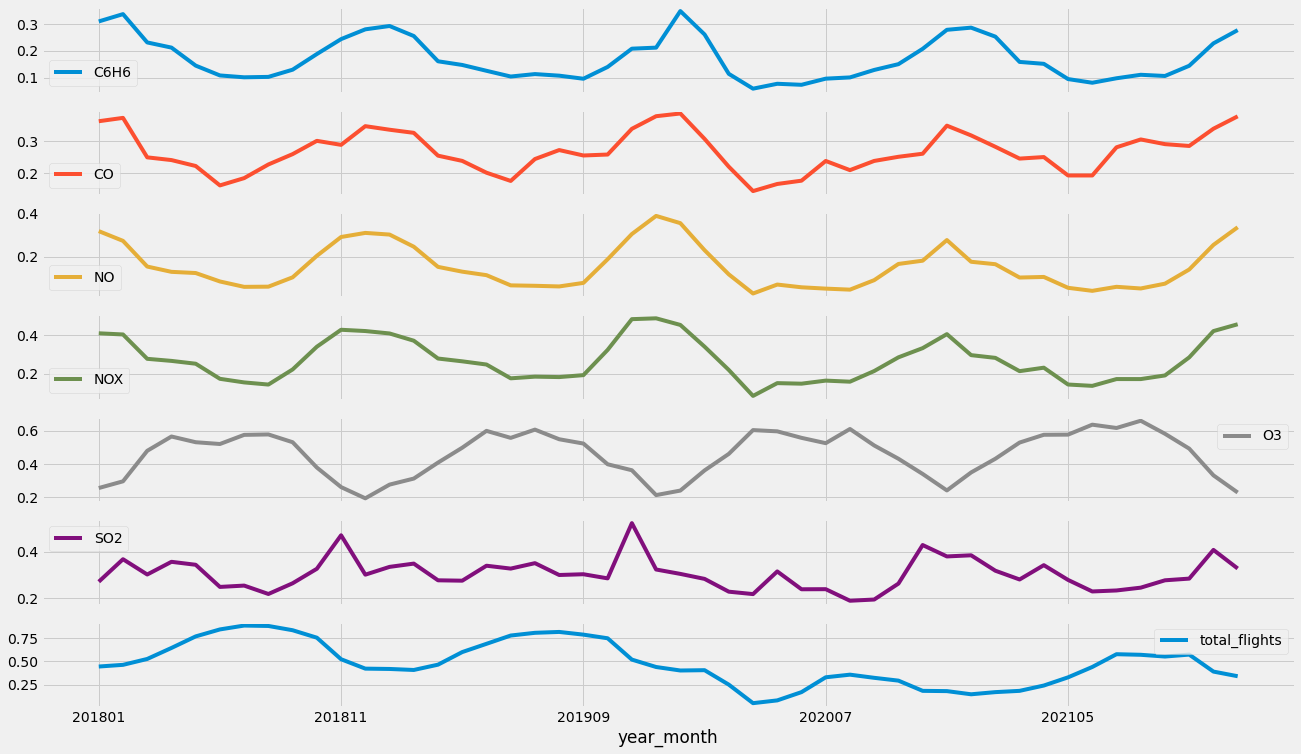

In [49]:
import matplotlib.pyplot as plt

df = df_quality_traffic_norm.loc[df_quality_traffic_norm['airport']=='Larnaka'].copy()
df['year_month'] = df['date'].dt.strftime('%Y%m') 
df  = df.groupby(['year_month']).mean()
 
# Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")
 
df[col_val].plot(subplots=True, figsize=(20, 12))

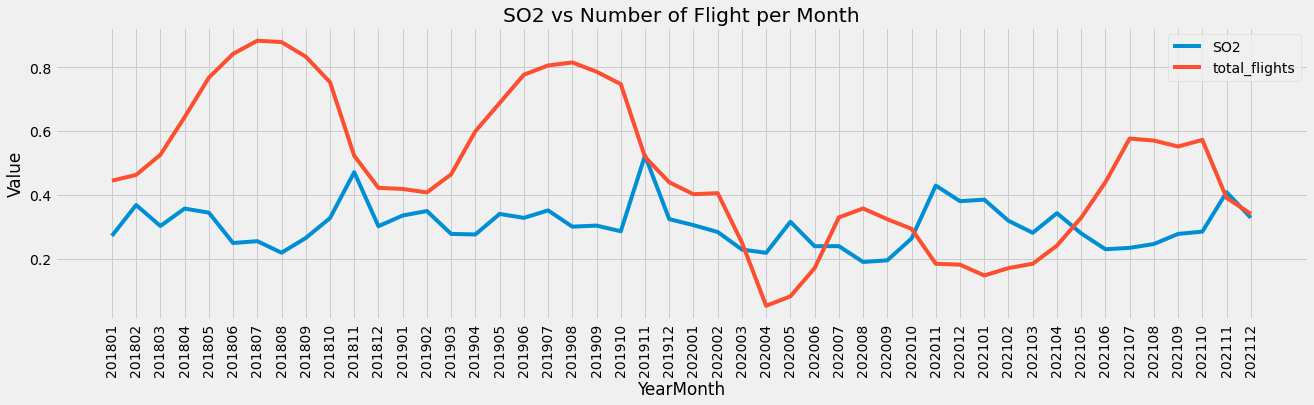

In [52]:
import matplotlib.pyplot as plt

def plot_trend(df,columns,xbl,ybl,title):
    # Using a inbuilt style to change
    # the look and feel of the plot
    plt.style.use("fivethirtyeight")

    # setting figure size to 12, 10
    plt.figure(figsize=(20, 5))

    plt.title(title)
    # Labelling the axes and setting
    # a title
    plt.xlabel(xbl)
    plt.ylabel(ybl)
    plt.xticks(rotation='vertical')
    plt.xticks
    
    for c in columns:
        plt.plot(df[c], label=c)
    
    plt.legend()
    plt.show()

    
col_val = ['SO2','total_flights']
df = df_quality_traffic_norm.loc[df_quality_traffic_norm['airport']=='Larnaka'].copy()
df['year_month'] = df['date'].dt.strftime('%Y%m')
df  = df.groupby(['year_month']).mean()
plot_trend(df,col_val,"YearMonth","Value","SO2 vs Number of Flight per Month")

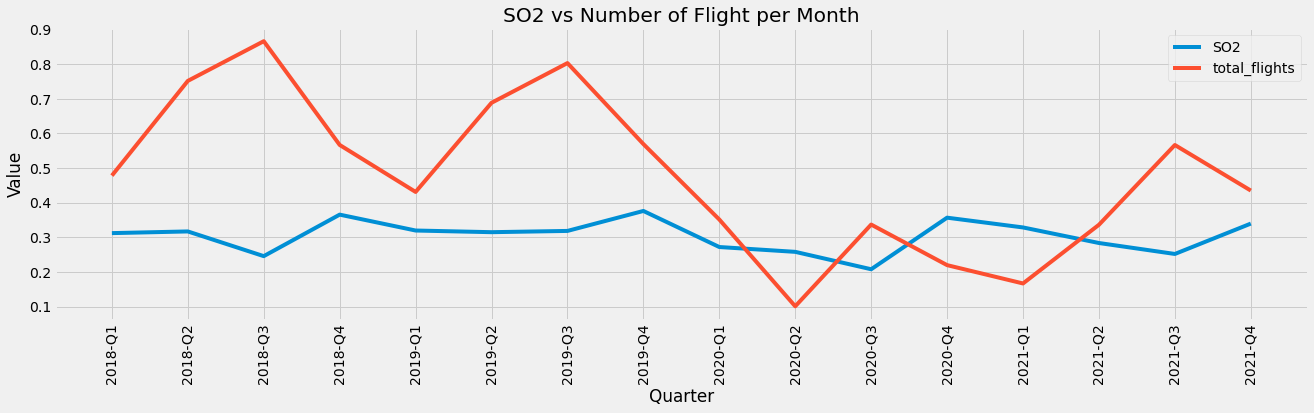

In [53]:
df = df_quality_traffic_norm.loc[df_quality_traffic_norm['airport']=='Larnaka'].copy()
df['quarter'] = (df['date'].dt.year.astype(str) + '-Q' + df['date'].dt.quarter.astype(str))
df  = df.groupby(['quarter']).mean()
col_val = ['SO2','total_flights']
plot_trend(df,col_val,"Quarter","Value","SO2 vs Number of Flight per Month")

##### Decompose Time-Series to See Components (Trend, Seasonality, Noise, etc)
Use the following custom function to decompose all of our time series with a montly seasonality (period=12 months):

In [123]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(df, share_type='amount', samples=250, period=24):
    if samples == 'all':
        #decomposing all time series timestamps
        res = seasonal_decompose(df[share_type].values, model='additive', period=period)
    else:
        #decomposing a sample of the time series
        res = seasonal_decompose(df[share_type].values[-samples:], model='additive', period=period)
    
    observed = res.observed
    trend = res.trend
    seasonal = res.seasonal
    residual = res.resid
    
    #plot the complete time series
    fig, axs = plt.subplots(4, figsize=(20,6))
    axs[0].set_title('OBSERVED', fontsize=14)
    axs[0].plot(observed)
    axs[0].grid()
    
    #plot the trend of the time series
    axs[1].set_title('TREND', fontsize=14)
    axs[1].plot(trend)
    axs[1].grid()
    
    #plot the seasonality of the time series. 
    #Period=24 daily seasonality | Period=24*7 weekly seasonality.
    axs[2].set_title('SEASONALITY', fontsize=14)
    axs[2].plot(seasonal)
    axs[2].grid()
    
    #plot the noise of the time series
    axs[3].set_title('NOISE', fontsize=14)
    axs[3].plot(residual)
    axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
    axs[3].grid()
    
    plt.show()

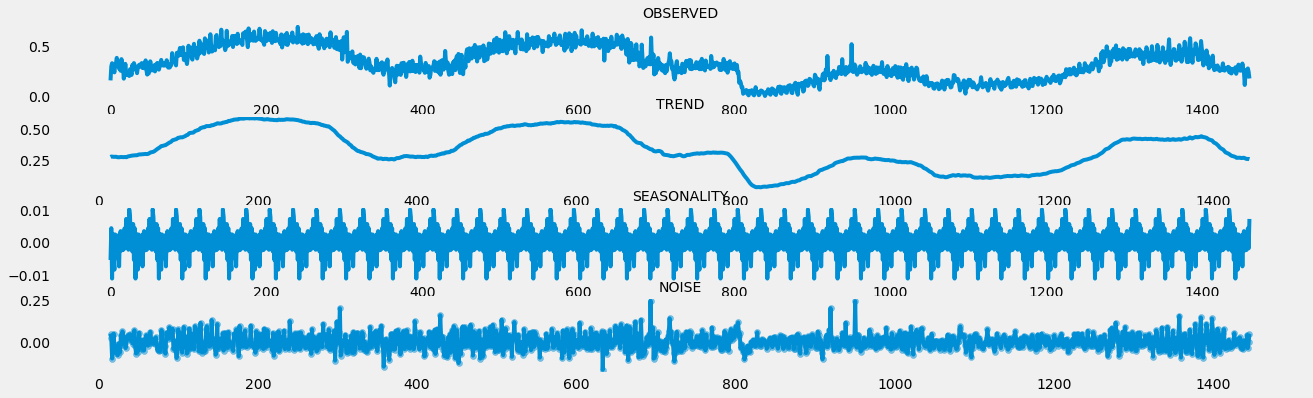

In [127]:
# https://coderzcolumn.com/tutorials/data-science/how-to-remove-trend-and-seasonality-from-time-series-data-using-python-pandas
df_plt = df_quality_traffic_norm.copy() 
df_plt = df_plt.groupby('date')['total_flights'].mean().reset_index()
decompose(df_plt,df_plt.columns.values[1], 'all',30)

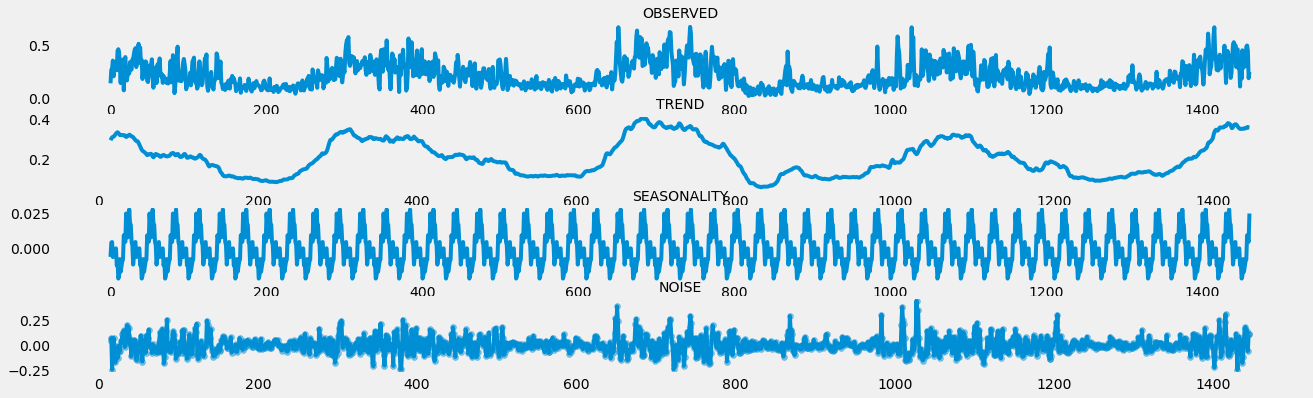

In [129]:
df_plt = df_quality_traffic_norm.copy()
df_plt = df_plt.groupby('date')['NOX'].mean().reset_index()
decompose(df_plt,df_plt.columns.values[1], 'all',30)

##### Checking Whether Time-Series is Stationary or Not 
We noticed from the above plots that there is the seasonality of 12 months in time-series. We can try different window sizes for testing purposes. We can check mean, variance and auto-covariance using moving window functions available with pandas

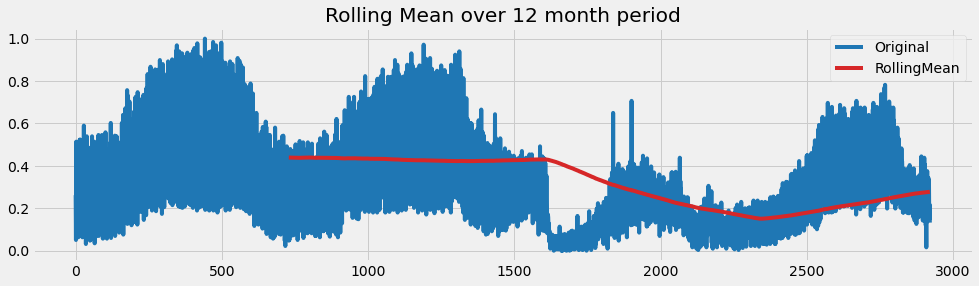

In [360]:
#plt_col = ['SO2_trend','total_flights']
df_plt = df_quality_traffic_norm.copy()
#df_plt['year_month'] = df_plt['date'].dt.strftime('%Y%m')
#df_plt = df_plt.groupby('year_month').mean()['total_flights']

df_plt['total_flights'].plot(figsize=(15,4), color="tab:blue", label = 'Original');
df_plt['total_flights'].rolling(window = 730).mean().plot(figsize=(15,4), color="tab:red", label = 'RollingMean', title="Rolling Mean over 12 month period");
plt.legend()

#### Auto-correlation Plot
Below we are also plotting an auto-correlation plot for time-series data as well. This plot helps us understand whether present values of time series are positively correlated, negatively correlated, or not related at all to past values. statsmodels library provides ready to use method plot_acf as a part of module statsmodels.graphics.tsaplots.

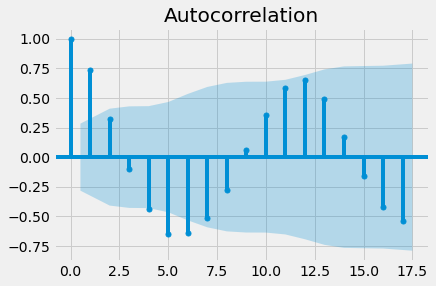

In [353]:
from statsmodels.graphics.tsaplots import plot_acf
df_plt = df_quality_traffic_norm.copy()
df_plt['year_month'] = df_plt['date'].dt.strftime('%Y%m')
df_plt = df_plt.groupby('year_month')['NOX'].mean().reset_index()
plot_acf(df_plt['NOX']);

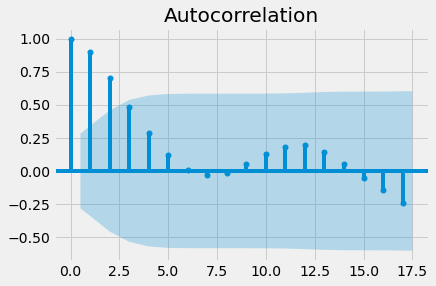

In [354]:
from statsmodels.graphics.tsaplots import plot_acf
df_plt = df_quality_traffic_norm.copy()
df_plt['year_month'] = df_plt['date'].dt.strftime('%Y%m')
df_plt = df_plt.groupby('year_month')['total_flights'].mean().reset_index()
plot_acf(df_plt['total_flights']);

#### Remove Seasonality by Applying Moving Window
As we have observed seasonality is generally present in the majority of values, we use the seasonal_decompose to extract the trend and use this for further analysis

In [361]:
df_decomposed = df_quality_traffic_norm[''].copy()
#df_decomposed['year_month'] = df_decomposed['date'].dt.strftime('%Y%m')
#df_decomposed = df_decomposed.groupby(['year_month','airport']).mean()
df_decomposed.index = pd.DatetimeIndex(df_decomposed['date'])
df_decomposed.index = pd.DatetimeIndex(df_decomposed.index.values,
                               freq=df_decomposed.index.inferred_freq)

#df_decomposed['date'] = pd.DatetimeIndex(df_decomposed['date'], freq=df_decomposed['date'].inferred_freq)

col_val = ['C6H6','CO','NO','NOX','O3','SO2','total_flights']
for c in col_val:
    decompose_result = seasonal_decompose(df_decomposed[c].values, model='additive', period=730)
    df_decomposed[str(c)+'_trend'] = decompose_result.trend
    
df_decomposed  = df_decomposed.loc[~df_decomposed.total_flights_trend.isna()]
df_decomposed.shape
df_decomposed.head(5)

#df_quality_traffic_norm['airport']=='Larnaka'

,date,airport,C6H6,CO,NO,NOX,O3,SO2,total_flights,C6H6_trend,CO_trend,NO_trend,NOX_trend,O3_trend,SO2_trend,total_flights_trend
2018-07-02,2018-07-02,Pafos,0.060738,0.122847,0.045475,0.067771,0.602332,0.032764,0.201893,0.162001,0.256904,0.124185,0.213104,0.515085,0.208681,0.439272
2018-07-03,2018-07-03,Larnaka,0.109183,0.206667,0.092592,0.196605,0.460908,0.214458,0.848580,0.162069,0.256896,0.124331,0.213243,0.515026,0.208873,0.439246
2018-07-03,2018-07-03,Pafos,0.056399,0.157314,0.032212,0.073048,0.614896,0.029534,0.258675,0.162030,0.256815,0.124297,0.213215,0.515057,0.208965,0.439138
2018-07-04,2018-07-04,Larnaka,0.092552,0.245766,0.052737,0.146156,0.516009,0.227671,0.914826,0.162032,0.256779,0.124280,0.213223,0.515069,0.209072,0.439086
2018-07-04,2018-07-04,Pafos,0.037599,0.163658,0.009103,0.023069,0.679794,0.087903,0.375394,0.162057,0.256720,0.124399,0.213327,0.515114,0.209332,0.439136


In [362]:
#df_quality_traffic.groupby(['year','month']).mean()
plt_col = ['C6H6_trend','CO_trend','NO_trend','NOX_trend','O3_trend','SO2_trend','total_flights_trend']
df_plt = df_decomposed.reset_index().copy()
df_plt = df_plt.loc[(df_plt['airport']=='Larnaka')&(df_plt.date.dt.year == 2020)]
df_plt[plt_col].corr().style.background_gradient(cmap='coolwarm')

,C6H6_trend,CO_trend,NO_trend,NOX_trend,O3_trend,SO2_trend,total_flights_trend
C6H6_trend,1.000000,0.927862,0.902431,0.947554,-0.665711,-0.547499,0.926780
CO_trend,0.927862,1.000000,0.981184,0.970891,-0.843730,-0.783925,0.963472
NO_trend,0.902431,0.981184,1.000000,0.983060,-0.876627,-0.832259,0.899682
NOX_trend,0.947554,0.970891,0.983060,1.000000,-0.801448,-0.725934,0.908228
O3_trend,-0.665711,-0.843730,-0.876627,-0.801448,1.000000,0.918433,-0.746904
SO2_trend,-0.547499,-0.783925,-0.832259,-0.725934,0.918433,1.000000,-0.647597
total_flights_trend,0.926780,0.963472,0.899682,0.908228,-0.746904,-0.647597,1.000000


In [363]:
#df_quality_traffic.groupby(['year','month']).mean()
plt_col = ['C6H6_trend','CO_trend','NO_trend','NOX_trend','O3_trend','SO2_trend','total_flights_trend']
#df_decomposed = df_quality_traffic_norm.copy() 
#.loc[df_quality_traffic_norm['airport']=='Larnaka']
df_plt = df_decomposed.loc[(df_decomposed['airport']=='Pafos')&(df_decomposed.date.dt.year == 2020)].copy() 
df_plt[plt_col].corr().style.background_gradient(cmap='coolwarm')

,C6H6_trend,CO_trend,NO_trend,NOX_trend,O3_trend,SO2_trend,total_flights_trend
C6H6_trend,1.000000,0.927398,0.901774,0.947297,-0.664695,-0.547708,0.926532
CO_trend,0.927398,1.000000,0.981177,0.970953,-0.843712,-0.785014,0.963406
NO_trend,0.901774,0.981177,1.000000,0.982992,-0.876797,-0.833239,0.899629
NOX_trend,0.947297,0.970953,0.982992,1.000000,-0.801350,-0.726749,0.908400
O3_trend,-0.664695,-0.843712,-0.876797,-0.801350,1.000000,0.918918,-0.746909
SO2_trend,-0.547708,-0.785014,-0.833239,-0.726749,0.918918,1.000000,-0.648894
total_flights_trend,0.926532,0.963406,0.899629,0.908400,-0.746909,-0.648894,1.000000


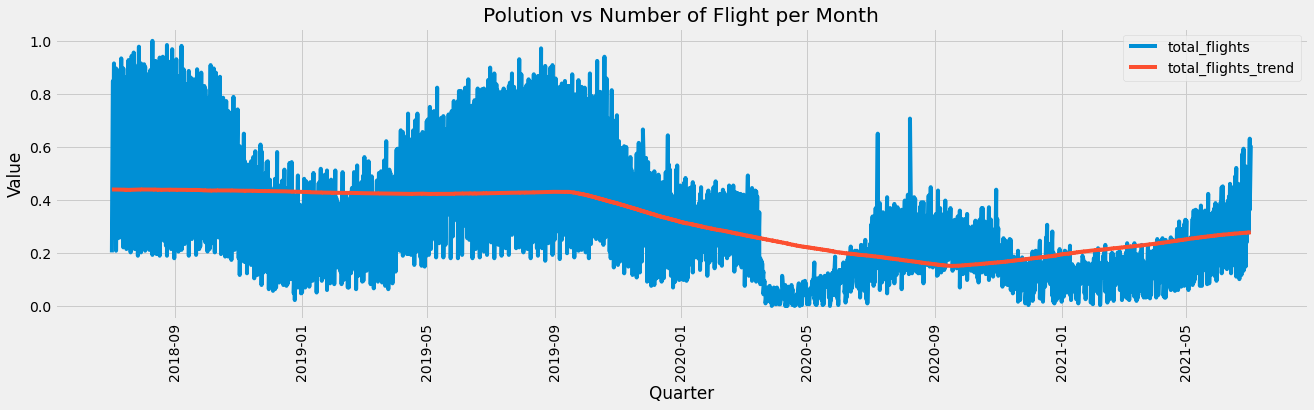

In [364]:
plt_col = ['total_flights','total_flights_trend']
df_plt = df_decomposed.copy()
#df_plt['year_month'] = df_plt['date'].dt.strftime('%Y%m')
#df_plt = df_plt.groupby('year_month').mean()
#f_plt = df_plt.set_index('year_month')[plt_col]
plot_trend(df_plt,plt_col,"Quarter","Value","Polution vs Number of Flight per Month")

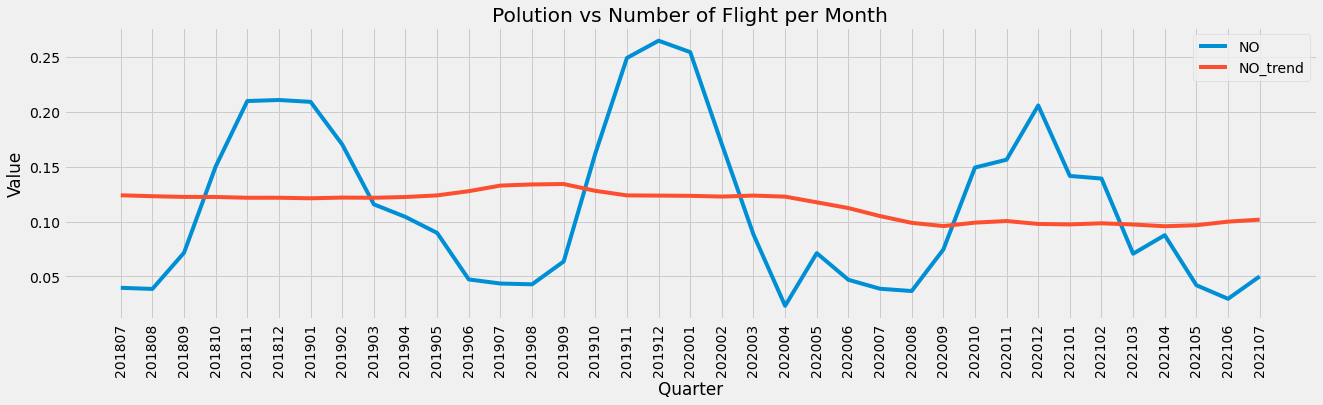

In [365]:
plt_col = ['NO','NO_trend']
df_plt = df_decomposed.copy()
df_plt['year_month'] = df_plt['date'].dt.strftime('%Y%m')
df_plt = df_plt.groupby('year_month').mean()
plot_trend(df_plt,plt_col,"Quarter","Value","Polution vs Number of Flight per Month")

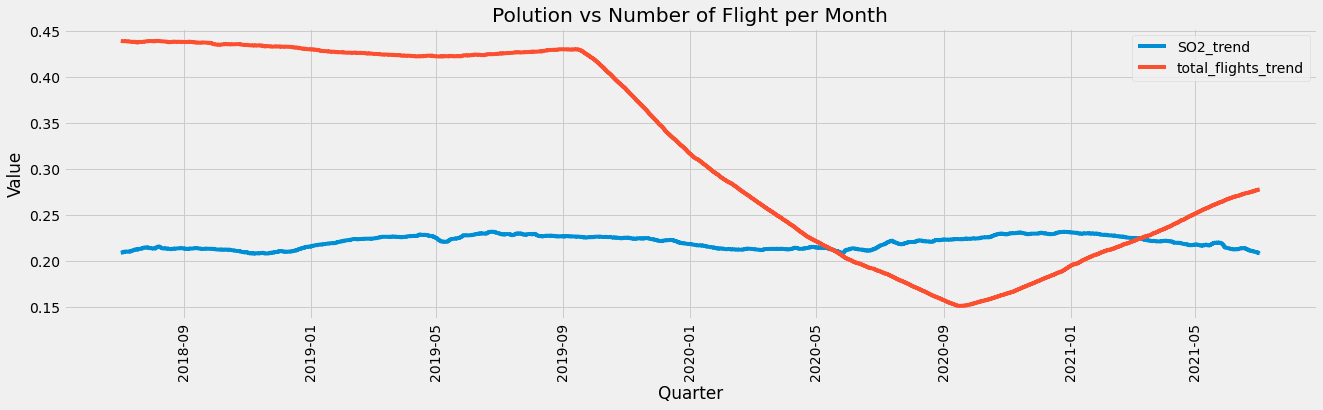

In [366]:
plt_col = ['SO2_trend','total_flights_trend']
df_plt = df_decomposed.copy()
df_plt = df_plt.set_index('date')[plt_col]
plot_trend(df_plt,plt_col,"Quarter","Value","Polution vs Number of Flight per Month")

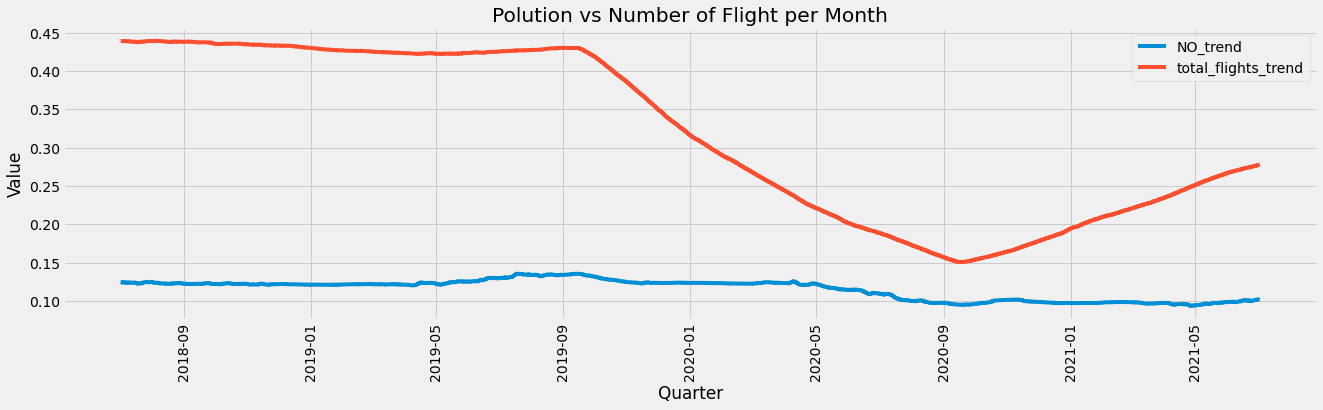

In [367]:
#https://www.noxfondet.no/en/articles/what-is-nox/
plt_col = ['NO_trend','total_flights_trend']
df_plt = df_decomposed.copy()
df_plt = df_plt.set_index('date')[plt_col]
plot_trend(df_plt,plt_col,"Quarter","Value","Polution vs Number of Flight per Month")

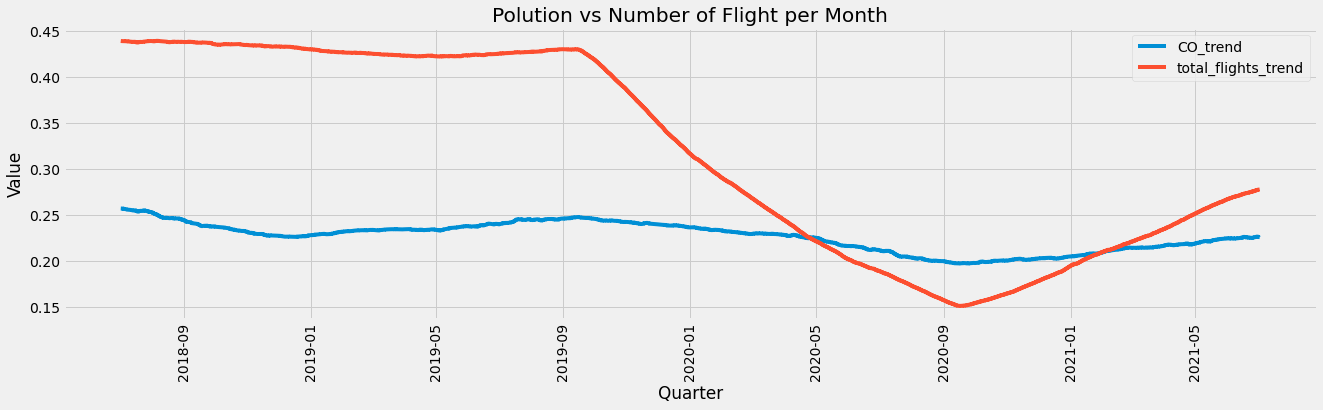

In [368]:
plt_col = ['CO_trend','total_flights_trend']
df_plt = df_decomposed.copy()
df_plt = df_plt.set_index('date')[plt_col]
plot_trend(df_plt,plt_col,"Quarter","Value","Polution vs Number of Flight per Month")

##### Predictions
https://builtin.com/data-science/time-series-forecasting-python


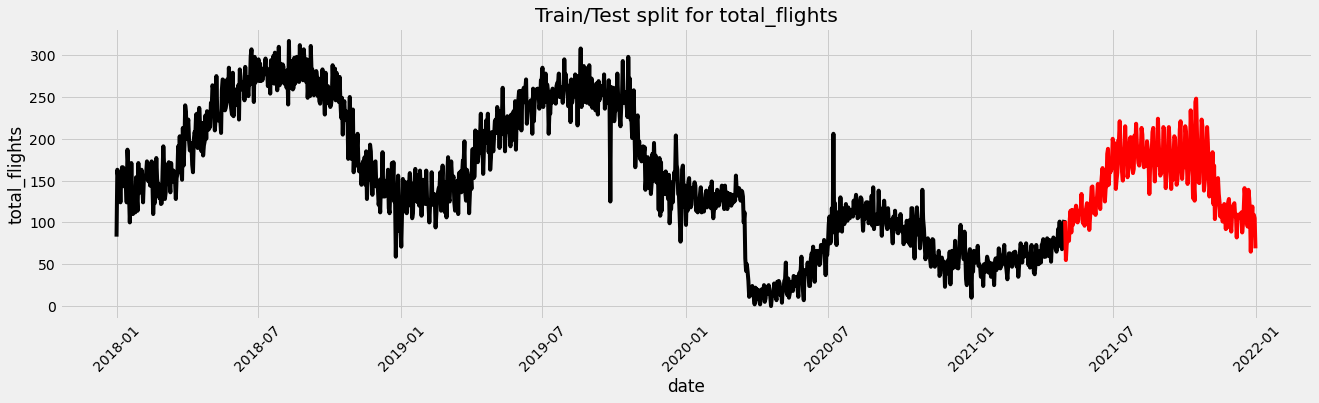

In [344]:
train = df_quality_traffic[(df_quality_traffic.airport=='Larnaka') \
                           &(df_quality_traffic.date < pd.to_datetime("2021-05-01", format='%Y-%m-%d'))] \
                            .set_index('date')
test = df_quality_traffic[(df_quality_traffic.airport=='Larnaka') \
                           &(df_quality_traffic.date >= pd.to_datetime("2021-05-01", format='%Y-%m-%d'))] \
                            .set_index('date')

train.index = pd.DatetimeIndex(train.index.values,
                               freq=train.index.inferred_freq)

plt.figure(figsize=(20, 5))
plt.plot(train['total_flights'], color = "black")
plt.plot(test['total_flights'], color = "red")
plt.ylabel('total_flights')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title("Train/Test split for total_flights")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE:  57.86230139718537


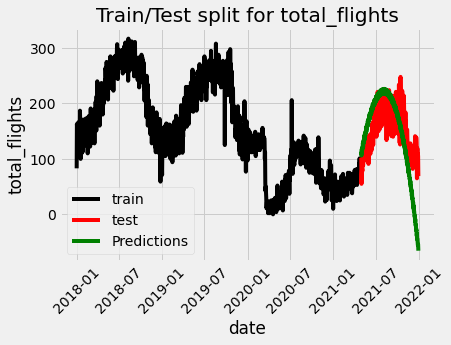

In [319]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#We can also evaluate the performance using the root mean-squared error:
import numpy as np
from sklearn.metrics import mean_squared_error

y = train['total_flights']
ARMAmodel = SARIMAX(y, order = (3, 4, 6))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

plt.plot(train['total_flights'], color = "black", label = 'train')
plt.plot(test['total_flights'], color = "red", label = 'test')
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('total_flights')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title("Train/Test split for total_flights")
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(test["total_flights"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

# Autoregressive Integrated Moving Average (ARIMA)

In [320]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE:  57.86230139718537


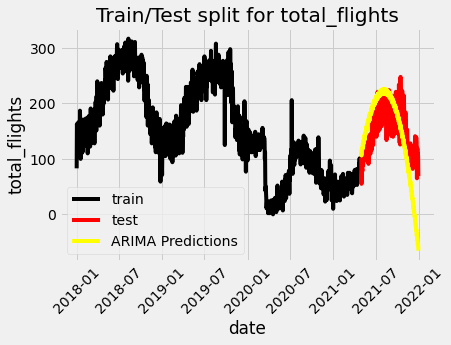

In [321]:
y = train['total_flights']

ARIMAmodel = ARIMA(y, order = (3, 4, 6))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train['total_flights'], color = "black", label = 'train')
plt.plot(test['total_flights'], color = "red", label = 'test')
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.ylabel('total_flights')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title("Train/Test split for total_flights")
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(test["total_flights"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE:  83.93614968927785


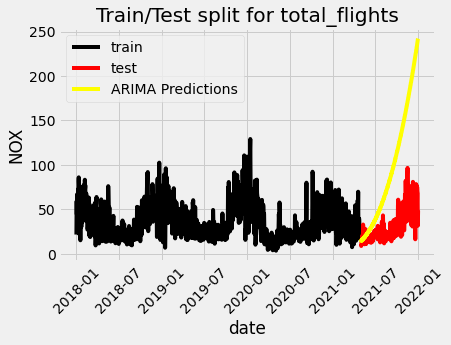

In [322]:
y = train['NOX']

ARIMAmodel = ARIMA(y, order = (2, 4, 5))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train['NOX'], color = "black", label = 'train')
plt.plot(test['NOX'], color = "red", label = 'test')
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.ylabel('NOX')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title("Train/Test split for total_flights")
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(test["NOX"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)